# 20,000+ Lichess Games Analysis from 2016

This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org (all games are from 2016).

- Game ID
- Rated (T/F)
- Start Time
- End Time;
- Number of Turns
- Game Status
- Winner
- Time Increment
- White Player ID
- White Player Rating
- Black Player ID
- Black Player Rating
- All Moves in Standard Chess Notation
- Opening Eco (Standardised Code for any given opening, list here)
- Opening Name
- Opening Ply (Number of moves in the opening phase)

Possible Uses:

Lots of information is contained within a single chess game, let alone a full dataset of multiple games. It is primarily a game of patterns, and data science is all about detecting patterns in data, which is why chess has been one of the most invested in areas of AI in the past. This dataset collects all of the information available from 20,000 games and presents it in a format that is easy to process for analysis of, for example, what allows a player to win as black or white, how much meta (out-of-game) factors affect a game, the relationship between openings and victory for black and white and more.

Data Set: https://www.kaggle.com/datasnaek/chess

# In this Notebook

**Finished:**

- Importing Lichess.csv
- Player Rating Distributions
- Plotting Distributions of Turns Per Game
- Preferences of Openings for All Players
- Preferences of Openings for All Players (numerical)
- Preferences of Openings for All Players (graph)
- Winning Percentages Based on Color
- Preferred Player Openings by Ratings
    - Prefered Player Openings by Rating and Color
- Preferred Player Openings by Color

**Unfinished:**

(Short)

- Group Openings that are Based on Similar Openings
    - (Could do, but the variations are important and do not want to mislead if there is one opening with thousands of variations that are very different that would be summed to a large number. This would make the opening seem to be used often but not actually true)

(Long)
- Winning Percentage for each Color Based on Opening
- Winning Percentage of Opening 
    - Winning Percentage of Opening Based on Rating
- If more data is found for multiple years: compare above distributions, preferences, and percentages over multiple years.

**Importing Lichess.csv**

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import math

def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

plt.rcParams.update({'font.size': 22})

**Player Rating Distributions**

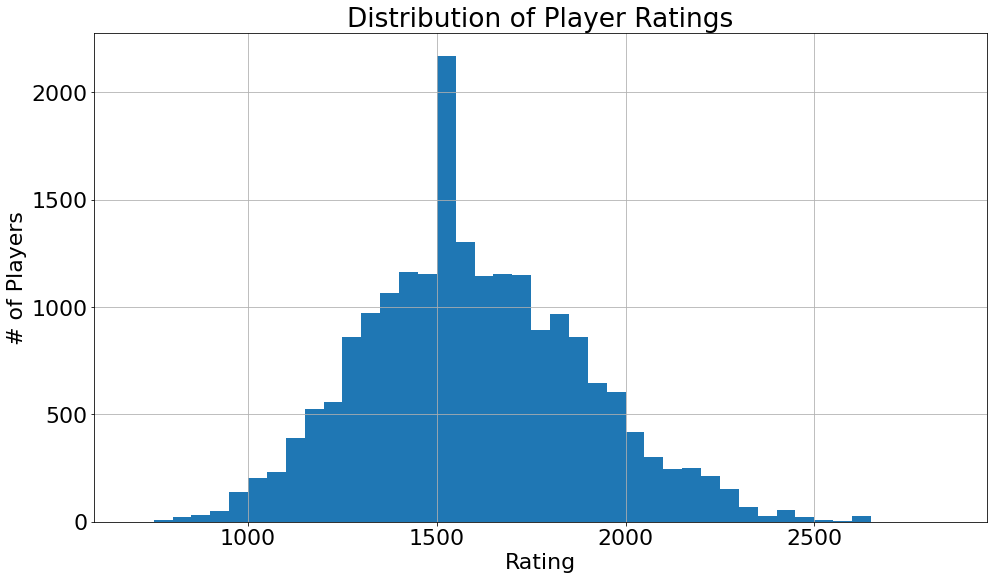

In [2]:
my_bins = range(700, 2900, 50)
    
df = pd.read_csv('Lichess.csv')
df.hist(column = 'white_rating', bins = my_bins, figsize = (16, 9))
plt.title('Distribution of Player Ratings')
plt.ylabel('# of Players')
plt.xlabel('Rating')
plt.plot();

**Plotting Distributions of Turns Per Game**

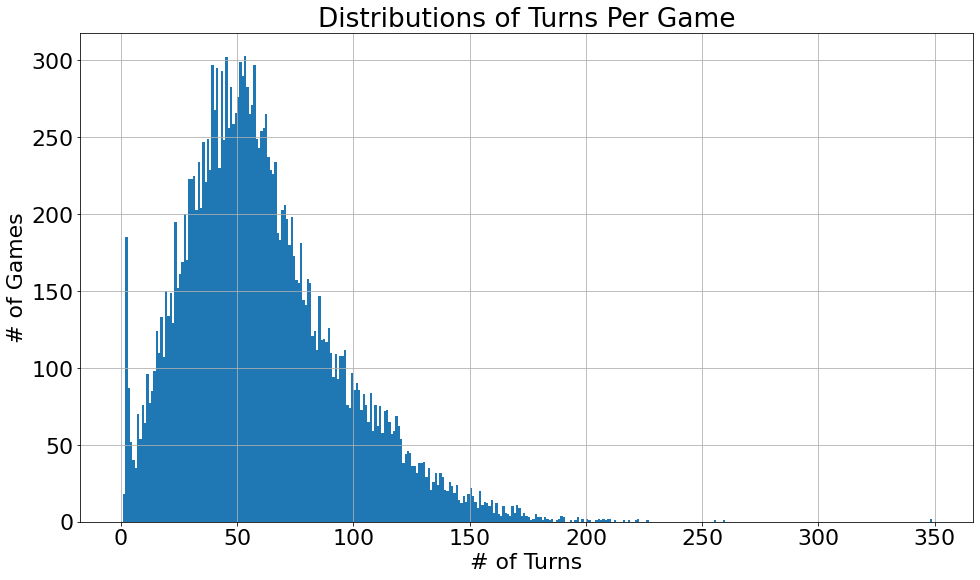

In [3]:
my_bins = range(0, 350, 1)

dfturns = pd.read_csv('Lichess.csv')
dfturns.hist(column = 'turns', bins = my_bins, figsize = (16, 9))
plt.title('Distributions of Turns Per Game')
plt.ylabel('# of Games')
plt.xlabel('# of Turns')
plt.plot();

**Preferences of Openings for All Players (numerical)**

In [4]:
dfopen = pd.read_csv('Lichess.csv')
print(dfopen['opening_name'].value_counts());

Van't Kruijs Opening                                                                     368
Sicilian Defense                                                                         358
Sicilian Defense: Bowdler Attack                                                         296
Scotch Game                                                                              271
French Defense: Knight Variation                                                         271
                                                                                        ... 
Queen's Pawn Game: Colle System |  Gruenfeld Formation                                     1
Nimzo-Indian Defense: Normal Variation |  Schlechter Defense                               1
English Opening: King's English Variation |  Two Knights Variation |  Keres Variation      1
Sicilian Defense: Smith-Morra Gambit Accepted |  Morphy Defense                            1
French Defense: Tarrasch Variation |  Chistyakov Defense |  Modern Lin

**Preferences of Openings for All Players (graph)**

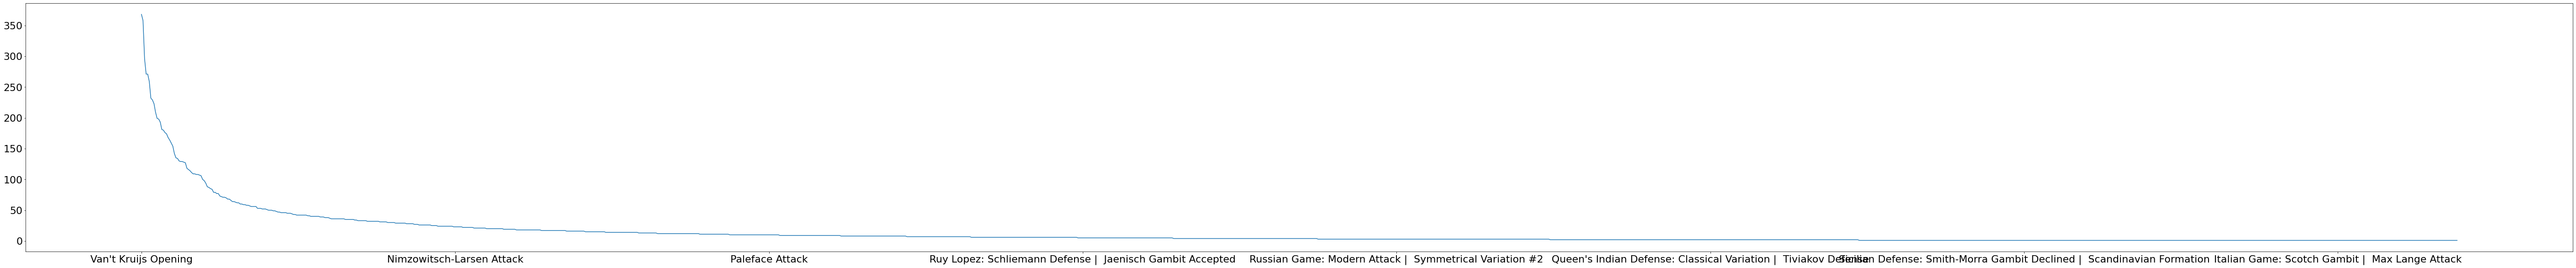

In [5]:
dfopen['opening_name'].value_counts().plot(figsize = (100, 10));

**Winning Percentages based on Color**

In [6]:
dfwinner = pd.read_csv('Lichess.csv')
print(dfwinner['winner'].value_counts())
x = (9107/(10001+9107+950))*100
y = (10001/(10001+9107+950))*100
z = (950/(10001+9107+950))*100
print(truncate(y, 4))
print( truncate(x, 4))
print(truncate(z, 4))

white    10001
black     9107
draw       950
Name: winner, dtype: int64
49.8604
45.4033
4.7362


**Chance White Wins:** 49.8604%

**Chance Black Wins:** 45.4033%

**Chance a Tie Occurs:** 4.7362%

# **Preferred Player Openings by Rating and Color**

**White Ratings**

In [22]:
# my_bins = range(0, 10, 1)

dfopenrat = pd.read_csv('Lichess.csv')

ratingsw = dfopenrat["white_rating"]

ratingsw1 = dfopenrat[dfopenrat["white_rating"] < 1000]

ratingsw2 = dfopenrat[(dfopenrat["white_rating"] > 1000) | (dfopenrat["white_rating"] < 2000)]

ratingsw3 = dfopenrat[dfopenrat["white_rating"] > 2000]

ratingsw4 = dfopenrat.loc[dfopenrat["white_rating"] < 1000, "opening_name"]

ratingsw5 = dfopenrat.loc[dfopenrat["white_rating"] > 1000,"opening_name"]

ratingsw6 = dfopenrat.loc[dfopenrat["white_rating"] > 2000, "opening_name"]

ratingsw0 = dfopenrat.loc[dfopenrat["white_rating"], "opening_name"]

# dfopenrat.hist(column = 'white_rating', bins = my_bins, figsize = (16, 9));

**White's prefered openings under 1000 rating**

In [23]:
ratingsw4.value_counts()

Queen's Pawn Game                                                 15
Scandinavian Defense                                              11
Van't Kruijs Opening                                              11
King's Pawn Game                                                   9
Englund Gambit                                                     6
                                                                  ..
Robatsch (Modern) Defense                                          1
Blackmar-Diemer Gambit                                             1
Ruy Lopez                                                          1
King's Pawn Game: Wayward Queen Attack |  Kiddie Countergambit     1
Bishop's Opening                                                   1
Name: opening_name, Length: 120, dtype: int64

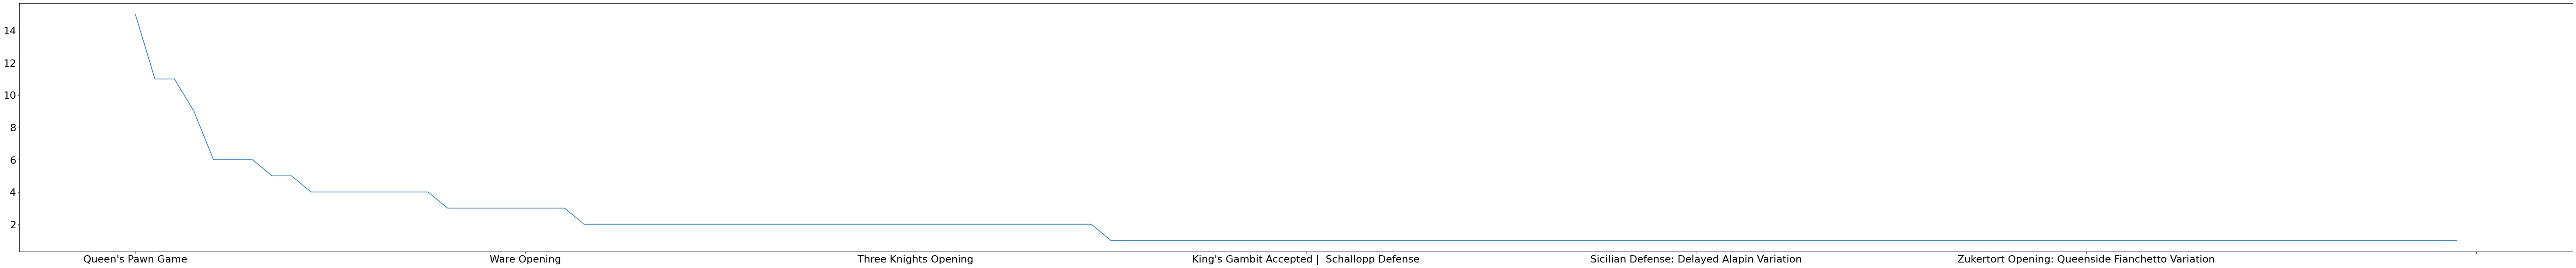

In [24]:
ratingsw4.value_counts().plot(figsize = (100, 10));

**White's prefered openings from 1000 to 2000 rating**

In [26]:
ratingsw5.value_counts()

Van't Kruijs Opening                                                        357
Sicilian Defense                                                            354
Sicilian Defense: Bowdler Attack                                            292
French Defense: Knight Variation                                            271
Scotch Game                                                                 269
                                                                           ... 
Four Knights Game: Scotch Variation |  Belgrade Gambit                        1
Sicilian Defense: Dragon Variation |  Yugoslav Attack |  Panov Variation      1
Benoni Defense: Taimanov Variation                                            1
Nimzo-Indian Defense: Kmoch Variation                                         1
English Opening: Symmetrical Variation |  Hedgehog Defense                    1
Name: opening_name, Length: 1476, dtype: int64

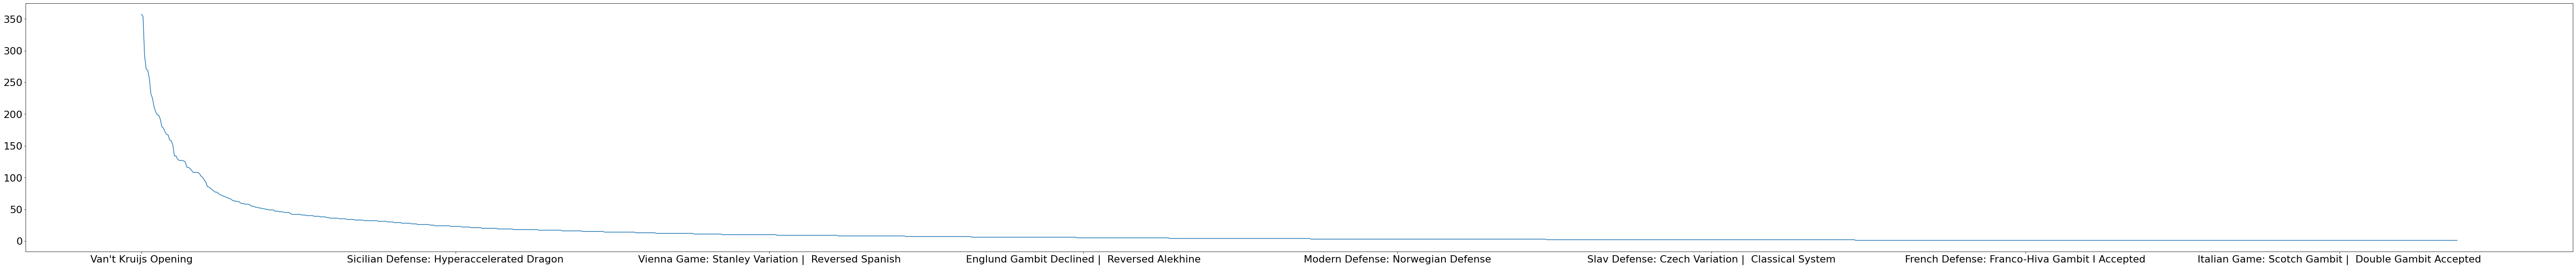

In [27]:
ratingsw5.value_counts().plot(figsize = (100, 10));

**White's prefered openings above 2000 rating**

In [28]:
ratingsw6.value_counts()

Indian Game                                                      18
Queen's Pawn Game: London System                                 17
Scandinavian Defense: Mieses-Kotroc Variation                    17
Horwitz Defense                                                  16
Queen's Pawn Game: Mason Attack                                  16
                                                                 ..
King's Indian Defense: Averbakh Variation |  Flexible Defense     1
Russian Game: Cozio (Lasker) Attack                               1
Queen's Gambit Declined: Modern |  Knight Defense #3              1
Old Indian Defense: Two Knights Variation                         1
English Opening: Symmetrical Variation |  Hedgehog Defense        1
Name: opening_name, Length: 717, dtype: int64

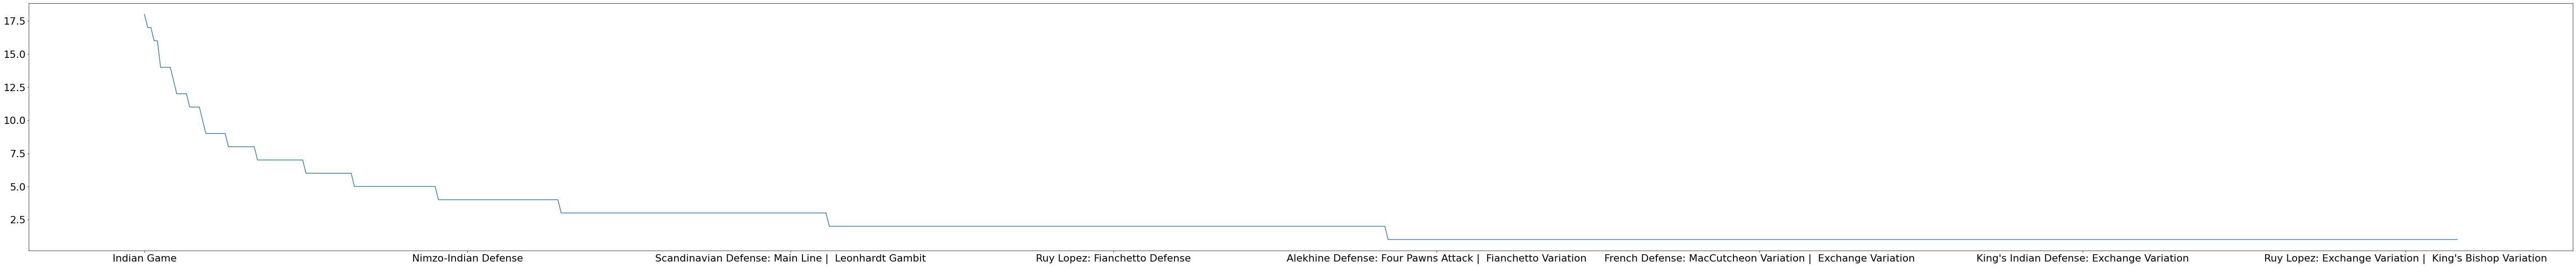

In [29]:
ratingsw6.value_counts().plot(figsize = (100, 10));

**Black Ratings**

In [39]:
# my_bins = range(0, 10, 1)

dfopenrat = pd.read_csv('Lichess.csv')

ratingsb = dfopenrat["black_rating"]

ratingsb1 = dfopenrat[dfopenrat["black_rating"] < 1000]

ratingsb2 = dfopenrat[(dfopenrat["black_rating"] > 1000) | (dfopenrat["black_rating"] < 2000)]

ratingsb3 = dfopenrat[dfopenrat["black_rating"] > 2000]

ratingsb4 = dfopenrat.loc[dfopenrat["black_rating"] < 1000, "opening_name"]

ratingsb5 = dfopenrat.loc[dfopenrat["black_rating"] > 1000, "opening_name"]

ratingsb6 = dfopenrat.loc[dfopenrat["black_rating"] > 2000, "opening_name"]

ratingsb0 = dfopenrat.loc[dfopenrat["black_rating"], "opening_name"]

**Black's prefered openings under 1000 rating**

In [40]:
ratingsb4.value_counts()

Van't Kruijs Opening                     23
Scandinavian Defense                     16
King's Pawn Game: Leonardis Variation    10
Pirc Defense #4                           9
Sicilian Defense                          9
                                         ..
Pirc Defense: Classical Variation         1
Portuguese Opening                        1
Ponziani Opening                          1
Alekhine Defense                          1
Bishop's Opening: Ponziani Gambit         1
Name: opening_name, Length: 139, dtype: int64

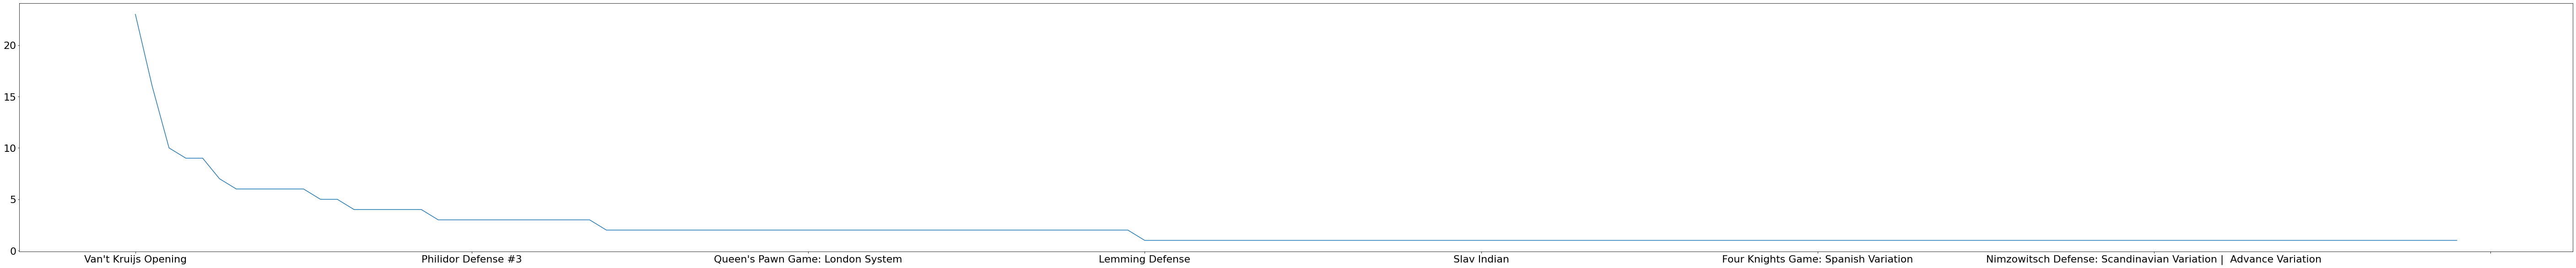

In [41]:
ratingsb4.value_counts().plot(figsize = (100, 10));

**Black's prefered openings from 1000 to 2000 rating**

In [42]:
ratingsb5.value_counts()

Sicilian Defense                                                   349
Van't Kruijs Opening                                               344
Sicilian Defense: Bowdler Attack                                   289
French Defense: Knight Variation                                   271
Scotch Game                                                        269
                                                                  ... 
Ruy Lopez: Open Variations                                           1
Italian Game: Classical Variation |  Center Holding Variation        1
King's Gambit Accepted |  Dodo Variation                             1
Nimzo-Indian Defense: Huebner Variation |  Rubinstein Variation      1
English Opening: Symmetrical Variation |  Hedgehog Defense           1
Name: opening_name, Length: 1475, dtype: int64

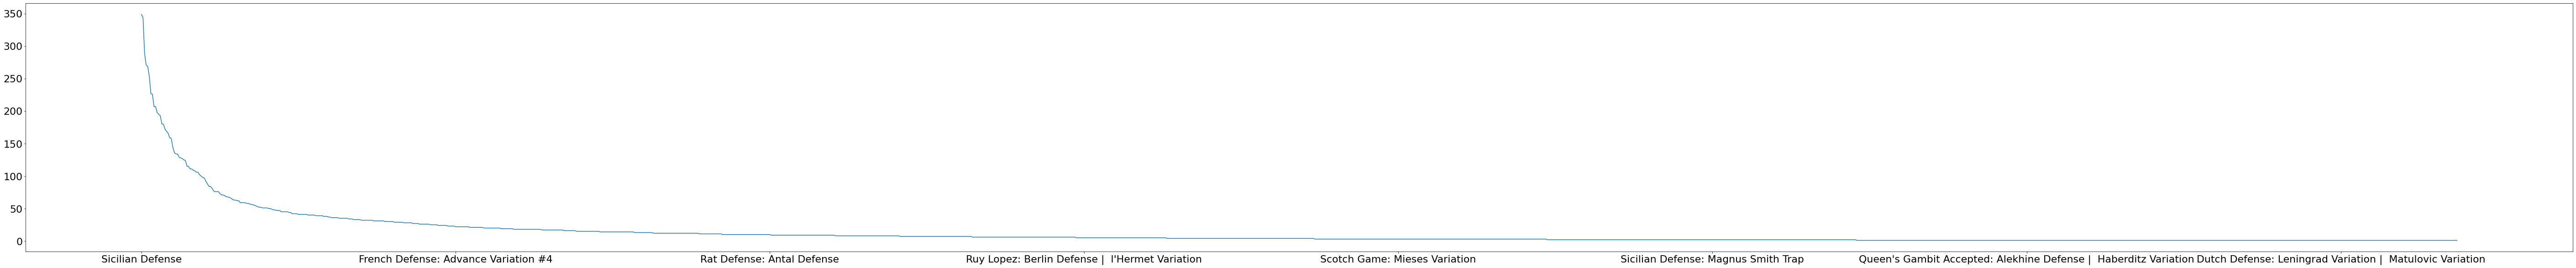

In [43]:
ratingsb5.value_counts().plot(figsize = (100, 10));

**Black's prefered openings above 2000 rating**

In [44]:
ratingsb6.value_counts()

Indian Game                                                          30
French Defense: Knight Variation                                     21
French Defense: Exchange Variation                                   19
Sicilian Defense                                                     18
Sicilian Defense: Old Sicilian                                       18
                                                                     ..
English Opening: Agincourt Defense |  Neo-Catalan Declined            1
Sicilian Defense: Kan Variation |  Modern Variation                   1
Latvian Gambit Accepted |  Bilguer Variation                          1
Old Indian Defense: Two Knights Variation                             1
English Opening: King's English Variation |  Three Knights System     1
Name: opening_name, Length: 694, dtype: int64

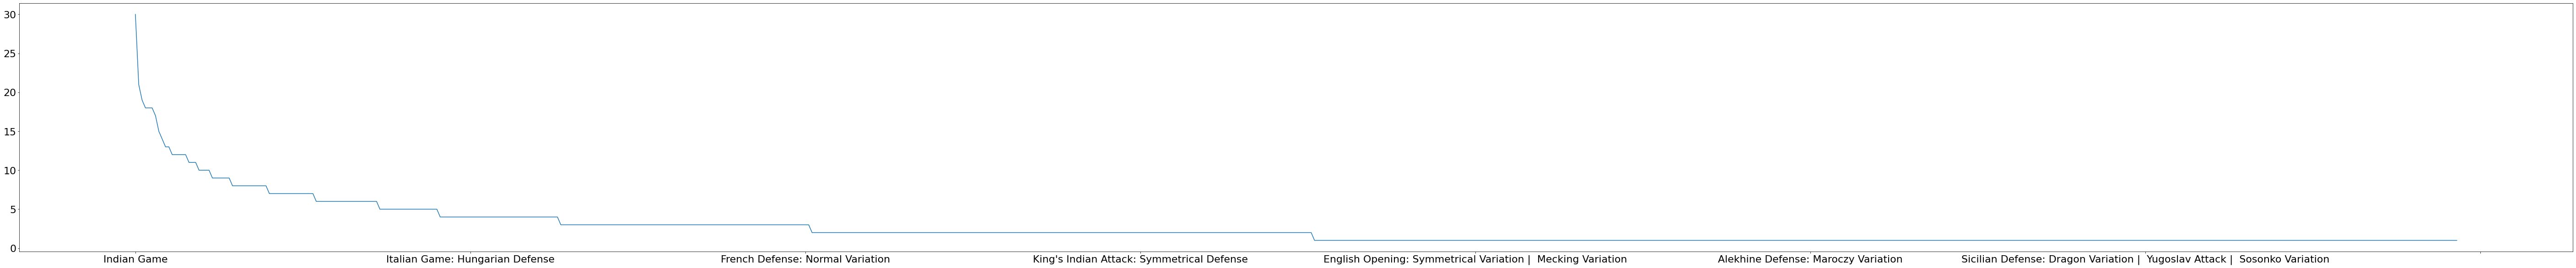

In [45]:
ratingsb6.value_counts().plot(figsize = (100, 10));

**Preferred openings based on starting color and removing double variations**

*White Starting Player*

In [46]:
ratingsw0.value_counts().head()

Queen's Pawn Game #2                869
Van't Kruijs Opening                421
French Defense: Knight Variation    414
Philidor Defense #3                 393
Sicilian Defense                    366
Name: opening_name, dtype: int64

*Black Starting Player*

In [47]:
ratingsb0.value_counts().head()

Queen's Pawn Game #2                876
Van't Kruijs Opening                412
French Defense: Knight Variation    380
Sicilian Defense                    355
Bishop's Opening                    318
Name: opening_name, dtype: int64